<a href="https://colab.research.google.com/github/hankaj/Machine-Learning-Techniques/blob/master/ML2021_First_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Load/Download the source Data

- winequality-red.csv
  - 1/2 members, Erasmus Students
- winequality-white.csv
  - 3/4 members

In [1]:
!wget https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv

--2021-10-19 08:32:10--  https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  82.23K  --.-KB/s    in 0.002s  

2021-10-19 08:32:10 (52.0 MB/s) - ‘winequality-red.csv’ saved [84199/84199]



In [ ]:
!wget https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-white.csv

--2021-10-08 08:29:57--  https://raw.githubusercontent.com/zygmuntz/wine-quality/master/winequality/winequality-white.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [text/plain]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K  --.-KB/s    in 0.03s   

2021-10-08 08:29:57 (8.11 MB/s) - ‘winequality-white.csv’ saved [264426/264426]



## 2. Transform data on a DataFrame

In [2]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv", sep =";")
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df_white = pd.read_csv("winequality-white.csv", sep =";")
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 3. Preprocessing

- Normalization (MinMax, Standard, ....)
- Feature Selection
  - **Do not use *quality* to build the models**
  - **Use quality only in the analysis/interpretation step**
  


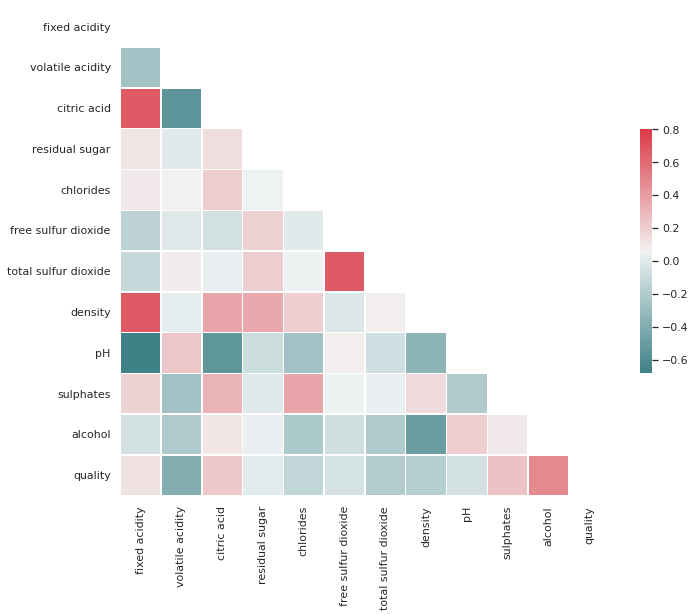

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_feat = np.transpose(df_red)
names = df_feat.index.values

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
R = np.corrcoef(df_feat)

# http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(200, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

The variables are correlated between them, but not too much (less than 1). So that we will continue having them in account but being conscious of their similarity. 

In [4]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.StandardScaler()
features_norm = min_max_scaler.fit_transform(df_feat)

## 4. Dimensionality Reduction 

- Dimensionality Reduction
- Visualization



Principal Component Analysis

In [8]:
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_) 

Variance Ratio:  [0.90347827 0.07076291]


Two components represents close to 90% of the variance, then I can consider this projection as good. 

In [10]:
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1])

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = names[i])
fig.show()

It can be observed that many of the variables are very similar among them, and only some of them like total sulfur dioxide, free sulfur dioxide, alcohol and fixed acidity which are different from the others and could be selected for further clustering.

## 5. Outlier Detection (optional)



## 6. Clustering

- k-means
- k-means + HAC

- HAC
- DBSCAN



K-MEANS

In [11]:
# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

In [13]:
labels

array([6, 2, 7, 1, 7, 0, 3, 9, 5, 2, 8, 4], dtype=int32)

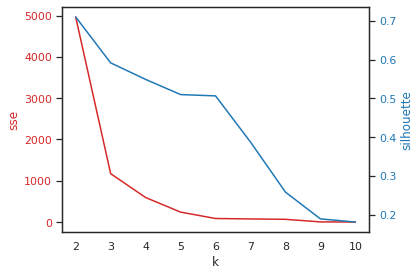

In [14]:
import matplotlib.pyplot as plt

x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [15]:
k = 3

In [16]:
print ("Number of clusters", k)
km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

Number of clusters 3


In [17]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.591
Distortion: 1171.90


In [18]:
km.labels_

array([0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0], dtype=int32)

In [21]:
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = km.labels_)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = df_feat.iloc[i,:].name)
fig.show()

## 7. Analysis/Interpretation of the Results

## Deliverable

- Colab Notebook (only one per team)
- Explanations about the process and the results. 